In [1]:
from scipy.spatial.distance import pdist , squareform
from scipy import exp
import numpy as np
from scipy.linalg import eigh
import matplotlib.pyplot as plt

In [2]:
def rbf_kernel_pca(X , gamma , n_components):
    """    RBF kernel PCA implementation.    
    Parameters
    -----------
    
    X: {NumPy ndarray}, shape = [n_samples, n_features]
    
    gamma: float
        Tuning parameter of the RBF kernel
    
    n_components: int
        Number of principal components to return
    
    Returns
    -----------
    
    X_pc: {NumPy ndarray}, shape = [n_samples, k_features]
    Projected dataset    
    """
    
    #calculate pairwise squared euclidean distances in the M*N dimensional dataset
    sq_dists = pdist(X , 'sqeuclidean')
    
    #convert pairwise distances into squarematrix
    mat_sq_dists = squareform(sq_dists)
    
    #compute the symmetric kernel matrix
    K = exp(-gamma * mat_sq_dists)
    
    #center the kernel matrix
    N = K.shape[0]
    one_n = np.ones((N , N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
    
    # Obtaining eigenpairs from the centered kernel matrix scipy.linalg.eigh returns them in ascending order
    eigvals , eigvecs = eigh(K)
    eigvals , eigvecs = eigvals[::-1] , eigvecs[: , ::-1]
    
    # Collect the top k eigenvectors (projected samples)
    X_pc = np.column_stack((eigvecs[:, i] for i in range(n_components)))
    return X_pc

<function matplotlib.pyplot.show(*args, **kw)>

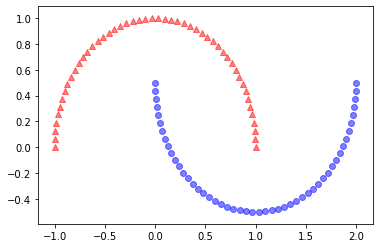

In [3]:
#making nonlinear samples
from sklearn.datasets import make_moons
X , y = make_moons(n_samples = 100 , random_state = 123)
plt.scatter(X[y==0 , 0] , X[y==0 , 1] , color = 'red' , marker = '^' , alpha = 0.5)
plt.scatter(X[y==1 , 0] , X[y==1 , 1] , color = 'blue' , marker = 'o' , alpha = 0.5)
plt.show

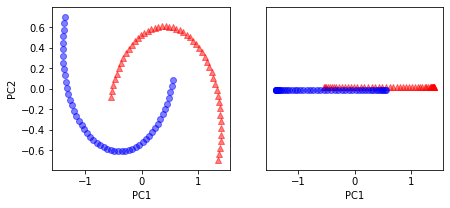

In [4]:
#separation using Standard PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_spca = pca.fit_transform(X)
fig , ax = plt.subplots(nrows=1 , ncols=2 , figsize = (7 , 3) )
ax[0].scatter(X_spca[y==0, 0], X_spca[y==0, 1], color='red', marker='^', alpha=0.5) 
ax[0].scatter(X_spca[y==1 , 0] , X_spca[y==1 , 1] , color = 'blue' , marker = 'o' , alpha = 0.5)
ax[1].scatter(X_spca[y==0 , 0] , np.zeros((50 , 1))+0.02 , color = 'red' , marker = '^' , alpha = 0.5 )
ax[1].scatter(X_spca[y==1 , 0] , np.zeros((50 , 1))-0.02 , color = 'blue' , marker = 'o' , alpha = 0.5 )
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.show() 

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:28: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:40: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


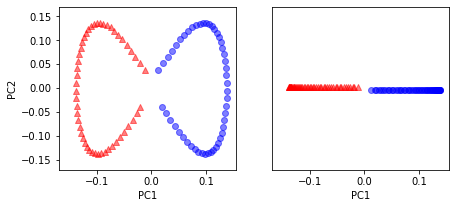

In [5]:
#Implementing in rbf_kernel_pca
X_kpca = rbf_kernel_pca(X , gamma = 15 , n_components=2)
fig , ax = plt.subplots(nrows=1 , ncols=2 , figsize = (7 , 3) )
ax[0].scatter(X_kpca[y==0, 0], X_kpca[y==0, 1], color='red', marker='^', alpha=0.5) 
ax[0].scatter(X_kpca[y==1 , 0] , X_kpca[y==1 , 1] , color = 'blue' , marker = 'o' , alpha = 0.5)
ax[1].scatter(X_kpca[y==0 , 0] , np.zeros((50 , 1))+0.02 , color = 'red' , marker = '^' , alpha = 0.5 )
ax[1].scatter(X_kpca[y==1 , 0] , np.zeros((50 , 1))-0.02 , color = 'blue' , marker = 'o' , alpha = 0.5 )
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.show() 

<function matplotlib.pyplot.show(*args, **kw)>

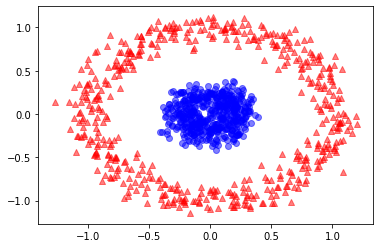

In [6]:
#Separating Concentric Circles
from sklearn.datasets import make_circles
X , y = make_circles(n_samples=1000 , noise = 0.1 , factor = 0.2 , random_state = 123)
plt.scatter(X[y==0 , 0] , X[y==0 , 1] , color = 'red' , marker = '^' , alpha = 0.5)
plt.scatter(X[y==1 , 0] , X[y==1 , 1] , color = 'blue' , marker = 'o' , alpha = 0.5)
plt.show

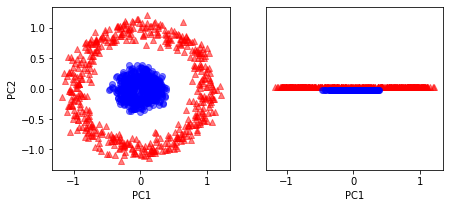

In [7]:
#standard PCA implementation
pca = PCA(n_components=2)
X_spca = pca.fit_transform(X)
fig , ax = plt.subplots(nrows=1 , ncols=2 , figsize = (7 , 3) )
ax[0].scatter(X_spca[y==0, 0], X_spca[y==0, 1], color='red', marker='^', alpha=0.5) 
ax[0].scatter(X_spca[y==1 , 0] , X_spca[y==1 , 1] , color = 'blue' , marker = 'o' , alpha = 0.5)
ax[1].scatter(X_spca[y==0 , 0] , np.zeros((500 , 1))+0.02 , color = 'red' , marker = '^' , alpha = 0.5 )
ax[1].scatter(X_spca[y==1 , 0] , np.zeros((500 , 1))-0.02 , color = 'blue' , marker = 'o' , alpha = 0.5 )
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.show() 

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:28: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:40: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


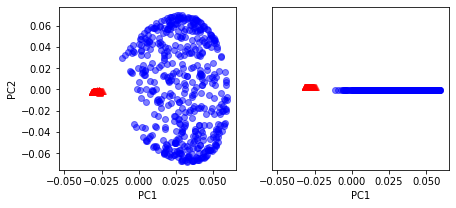

In [8]:
#RBF kernel implementation
X_kpca = rbf_kernel_pca(X , gamma = 15 , n_components=2)
fig , ax = plt.subplots(nrows=1 , ncols=2 , figsize = (7 , 3) )
ax[0].scatter(X_kpca[y==0, 0], X_kpca[y==0, 1], color='red', marker='^', alpha=0.5) 
ax[0].scatter(X_kpca[y==1 , 0] , X_kpca[y==1 , 1] , color = 'blue' , marker = 'o' , alpha = 0.5)
ax[1].scatter(X_kpca[y==0 , 0] , np.zeros((500 , 1))+0.02 , color = 'red' , marker = '^' , alpha = 0.5 )
ax[1].scatter(X_kpca[y==1 , 0] , np.zeros((500 , 1))-0.02 , color = 'blue' , marker = 'o' , alpha = 0.5 )
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.show() 

In [9]:
#Projecting new data
def rbf_kernel_pca(X , gamma , n_components):
    """    RBF kernel PCA implementation.    
    Parameters
    -----------
    
    X: {NumPy ndarray}, shape = [n_samples, n_features]
    
    gamma: float
        Tuning parameter of the RBF kernel
    
    n_components: int
        Number of principal components to return
    
    Returns
    -----------
    
    X_pc: {NumPy ndarray}, shape = [n_samples, k_features]
    Projected dataset    
    """
    
    #calculate pairwise squared euclidean distances in the M*N dimensional dataset
    sq_dists = pdist(X , 'sqeuclidean')
    
    #convert pairwise distances into squarematrix
    mat_sq_dists = squareform(sq_dists)
    
    #compute the symmetric kernel matrix
    K = exp(-gamma * mat_sq_dists)
    
    #center the kernel matrix
    N = K.shape[0]
    one_n = np.ones((N , N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
    
    # Obtaining eigenpairs from the centered kernel matrix scipy.linalg.eigh returns them in ascending order
    eigvals , eigvecs = eigh(K)
    eigvals , eigvecs = eigvals[::-1] , eigvecs[: , ::-1]
    
    # Collect the top k eigenvectors (projected samples)
    alphas = np.column_stack((eigvecs[:, i] for i in range(n_components)))
    
    # Collect the corresponding eigenvalues    
    lambdas = [eigvals[i] for i in range(n_components)]    
    return alphas, lambdas

In [10]:
X, y = make_moons(n_samples=100, random_state=123)
alphas, lambdas = rbf_kernel_pca(X, gamma=15, n_components=1)

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:29: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:41: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


In [11]:
x_new = X[25]
#x_new array([ 1.8713187 ,  0.00928245])
x_proj = alphas[25]
# original projection
#x_proj array([ 0.07877284])
def project_x(x_new, X, gamma, alphas, lambdas):
    pair_dist = np.array([np.sum((x_new-row)**2) for row in X]) 
    k = np.exp(-gamma * pair_dist)
    return k.dot(alphas / lambdas)

In [12]:
x_reproj = project_x(x_new, X, gamma=15, alphas=alphas, lambdas=lambdas)
x_reproj 

array([0.07877284])

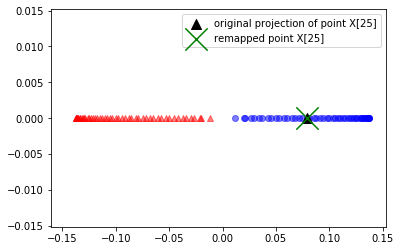

In [13]:
#let's visualize the projection on the first principal component:
plt.scatter(alphas[y==0, 0], np.zeros((50)), color='red', marker='^',alpha=0.5)
plt.scatter(alphas[y==1, 0], np.zeros((50)), color='blue', marker='o', alpha=0.5)
plt.scatter(x_proj, 0, color='black', label='original projection of point X[25]', marker='^', s=100)
plt.scatter(x_reproj, 0, color='green', label='remapped point X[25]', marker='x', s=500)
plt.legend(scatterpoints=1)
plt.show()

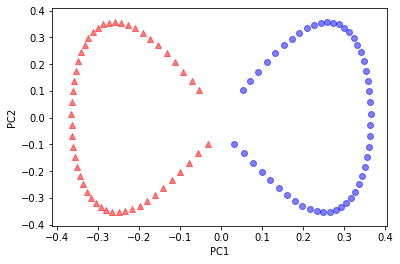

In [14]:
#KPCA using scikit learn
from sklearn.decomposition import KernelPCA
X , y = make_moons(n_samples=100 , random_state=123)
kpca = KernelPCA(n_components = 2 , kernel = 'rbf' , gamma = 15)
X_kpca = kpca.fit_transform(X)

#visualization
plt.scatter(X_kpca[y==0, 0], X_kpca[y==0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(X_kpca[y==1, 0], X_kpca[y==1, 1], color='blue', marker='o', alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show() 